# Visualisation of the last recording signals and Band Power energy

In [21]:
%load_ext autoreload
%autoreload 2

from BandPower import *
import glob 
import os 
list_of_files = glob.glob('../DATA/*') # * means all if need specific format then *.csv 
latest_file = max(list_of_files, key=os.path.getctime)
latest_smell = max(glob.glob(latest_file+'/*'),key=os.path.getctime)
#latest_smell = '../DATA/subject_17/smell 1.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


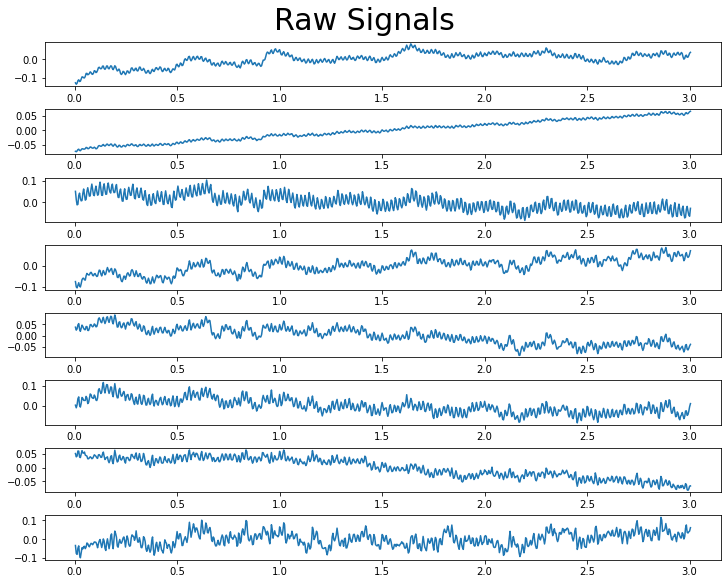

In [22]:
df = pd.read_csv(latest_smell)
plot_raw_signal(df)

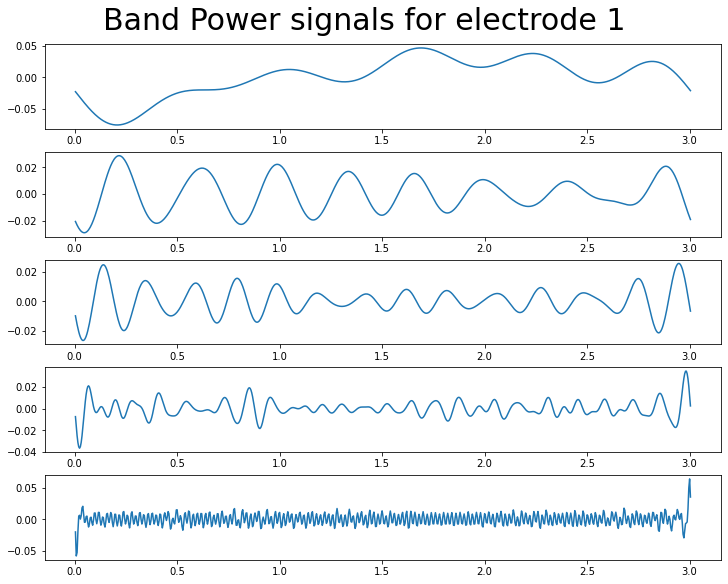

In [23]:
BPS = toBandPower(df)
plot_bandPower_signal(BPS,df,electrode = 1)

In [1]:
BPVE=BP_varying_energy(BPS,df,nb_samples=100)
plt.plot(BPVE[0][0],'-o')
plt.title("Energie de la bande spectrale delta pour l'electrode 1 en fonction du temps")
plt.show()

NameError: name 'BP_varying_energy' is not defined

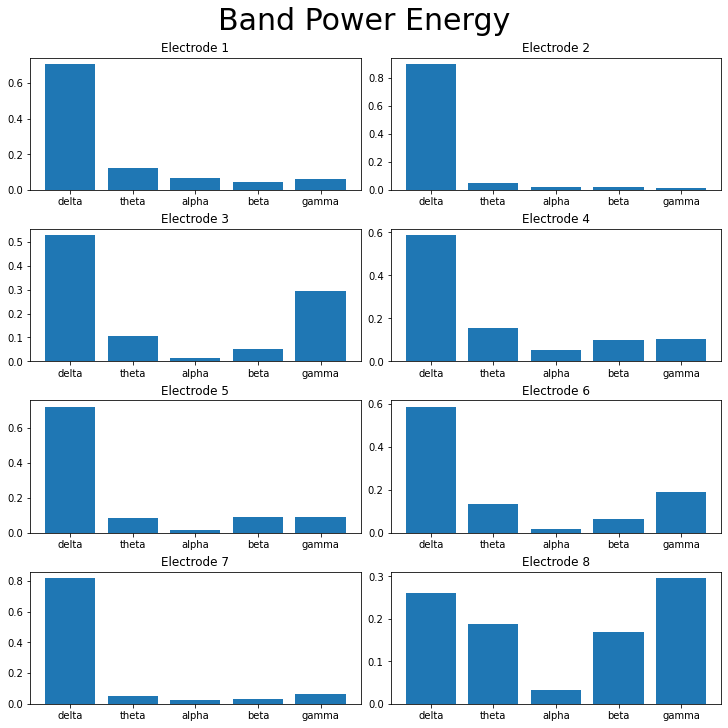

In [34]:

BPEnergy = get_BPEnergy(BPS,df)
plot_bandPower_energy(BPEnergy)

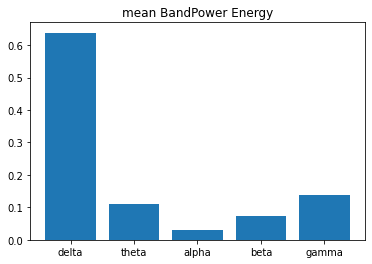

In [35]:
M = meanEnergy(BPEnergy)
plt.bar(range(5),height = M,tick_label=['delta','theta','alpha','beta','gamma'])
plt.title('mean BandPower Energy')
plt.show()